In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator

In [2]:
def get_msm_types(ids, nc, ml, npc):
    out = []
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                states = ids[k][i,j]
                if any( np.concatenate(( np.isnan(states) )) ):
                    continue
                ns = len(np.unique(states[:,0]))
                out.append([ nc[i], ml[j], npc[k], ns ])
    return np.array(out)

In [3]:
def check_states(msm, out=None):
    up = {}
    for i in np.unique(msm[:,3]):
        up[i] = np.where(msm[:,3]==i)[0].shape[0]
    if out != None:
        out = msm[:,2][np.where(msm[:,3]==out)[0]]
        out = {k:np.where(out==k)[0].shape[0] for k in np.unique(out)}
        
    return up, out

In [4]:
def get_state_purities(ids, nc, ml, npc, if_n=None, ignore_lower=True):
    out = {i:[] for i in range(3)}
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                states = ids[k][i,j]
                
                if any( np.isnan(states[:,0]) ) and ignore_lower:
                    continue
                else:
                    states = states[~np.isnan(states[:,0])]
                    
                if if_n != None and np.unique(states[:,0]).shape[0] != if_n :
                    continue
                    
                for l in states:
                    out[l[0]].append( l[1] )
                    
    return out

In [5]:
def get_reverse_ecdf(data, maxi=1, mini=0, dt=0.01):
    out = [ ]
    prev = 1
    for i in np.arange(mini, maxi+dt, dt):
        curr = np.where(data >= i)[0].shape[0]/data.shape[0]
        out.append( [i, prev] )
        out.append( [i, curr] )
        prev = curr + 0
    return np.array(out)

In [6]:
n_clus = np.array([20, 30, 50, 70, 100, 150, 250, 350, 500, 700, 1000, 1500])
msm_lags = np.arange(5,50+1,5)
n_pcca = np.array([3, 4, 5, 6])

In [7]:
markers = np.array(['o', '^', 's'])
colors = np.array(['blue', 'green', 'red'])

In [8]:
ids_direct = [np.load(f'direct/saved_msm/ids_{i}.npy') for i in n_pcca]
ids_supervised = [np.load(f'supervised/saved_msm/ids_{i}.npy') for i in n_pcca]
ids_urf2 = [np.load(f'urf/saved_h2_msm/ids_{i}.npy') for i in n_pcca]
ids_urf3 = [np.load(f'urf/saved_h3_msm/ids_{i}.npy') for i in n_pcca]

In [9]:
states_direct = get_msm_types(ids_direct, n_clus, msm_lags, n_pcca)

states_supervised = [
    get_msm_types([ids_supervised[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca)
for j in range(5)]

states_urf2 = [
    get_msm_types([ids_urf2[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca)
for j in range(5)]

states_urf3 = [
    get_msm_types([ids_urf3[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca)
for j in range(5)]

In [10]:
check_states(states_direct, 3)

({2: 460, 3: 4}, {6: 4})

In [11]:
for r, i in enumerate(states_supervised):
    print(r, check_states(i, 3))

0 ({2: 442}, {})
1 ({2: 469, 3: 1}, {4: 1})
2 ({2: 428, 3: 1}, {6: 1})
3 ({2: 463, 3: 7}, {5: 5, 6: 2})
4 ({2: 433, 3: 4}, {6: 4})


In [12]:
for r, i in enumerate(states_urf2):
    print(r, check_states(i, 3))

0 ({2: 286, 3: 70}, {4: 4, 5: 9, 6: 57})
1 ({2: 331, 3: 110}, {4: 1, 5: 8, 6: 101})
2 ({2: 337, 3: 108}, {5: 8, 6: 100})
3 ({2: 207, 3: 142}, {3: 5, 5: 51, 6: 86})
4 ({2: 285, 3: 90}, {4: 2, 5: 24, 6: 64})


In [13]:
for r, i in enumerate(states_urf3):
    print(r, check_states(i, 3))

0 ({2: 282, 3: 108}, {4: 1, 5: 15, 6: 92})
1 ({2: 257, 3: 120}, {3: 1, 4: 1, 5: 27, 6: 91})
2 ({2: 302, 3: 128}, {4: 4, 5: 13, 6: 111})
3 ({2: 251, 3: 106}, {3: 1, 4: 1, 5: 21, 6: 83})
4 ({2: 273, 3: 116}, {3: 1, 5: 24, 6: 91})


In [10]:
np.sum([70,110,108,142,92])/np.concatenate((states_urf2)).shape[0]

0.26551373346897256

In [11]:
np.sum([108,120,128,106,116])/np.concatenate((states_urf3)).shape[0]

0.2974781266083376

In [12]:
(0.2655+0.2974)/2

0.28145

In [14]:
np.concatenate((states_urf2)).shape, np.concatenate((states_urf3)).shape

((1966, 4), (1943, 4))

In [15]:
np.sum([70,110,108,142,92]+[108,120,128,106,116])

1100

In [16]:
1966+1943

3909

In [22]:
len(n_clus)*len(n_pcca)*len(msm_lags)

480

In [24]:
states_direct.shape

(464, 4)

In [25]:
[i.shape for i in states_supervised]

[(442, 4), (470, 4), (429, 4), (470, 4), (437, 4)]

In [26]:
[i.shape for i in states_urf2]

[(356, 4), (441, 4), (445, 4), (349, 4), (375, 4)]

In [27]:
[i.shape for i in states_urf3]

[(390, 4), (377, 4), (430, 4), (357, 4), (389, 4)]

In [1]:
480*16

7680

In [2]:
464+442+470+429+470+437+356+441+445+349+375+390+377+430+357+389

6621

In [3]:
6621/7680

0.862109375

In [14]:
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=7
plt.rcParams['ytick.major.width']=2

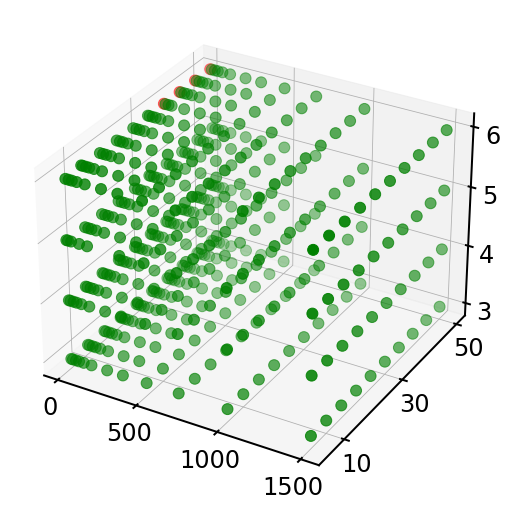

In [16]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(states_direct[:,0], states_direct[:,1], states_direct[:,2], 
           marker='o', c=colors[states_direct[:,3]-1], s=120)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig('plots/direct.pdf')
plt.show()

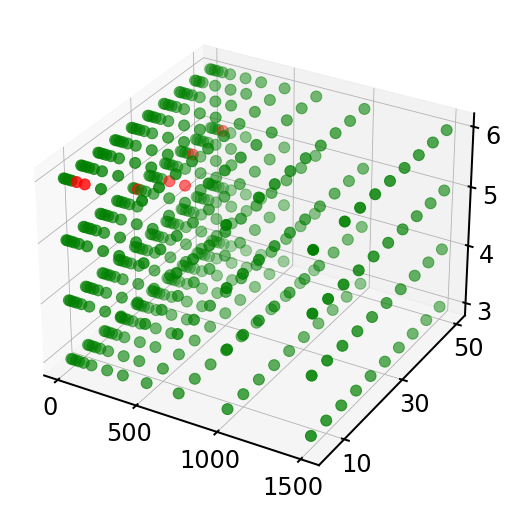

In [21]:
i=3
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(states_supervised[i][:,0], states_supervised[i][:,1], states_supervised[i][:,2], 
           marker='o', c=colors[states_supervised[i][:,3]-1], s=120)
ax.tick_params(labelsize=24)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig(f'plots/supervised{i}.pdf')
plt.show()

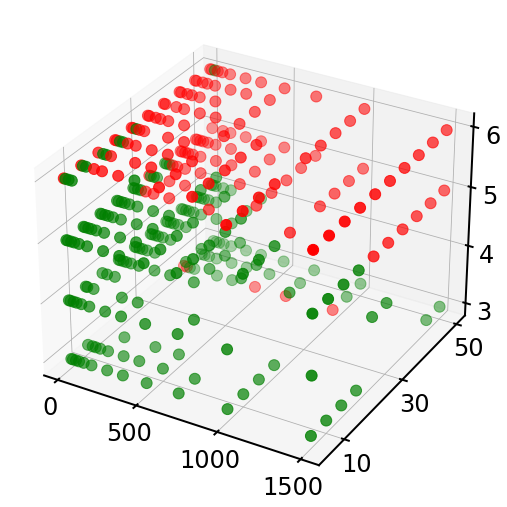

In [26]:
i=3
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(states_urf2[i][:,0], states_urf2[i][:,1], states_urf2[i][:,2], 
           marker='o', c=colors[states_urf2[i][:,3]-1], s=120)
ax.tick_params(labelsize=24)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig(f'plots/urf2_{i}.pdf')
plt.show()

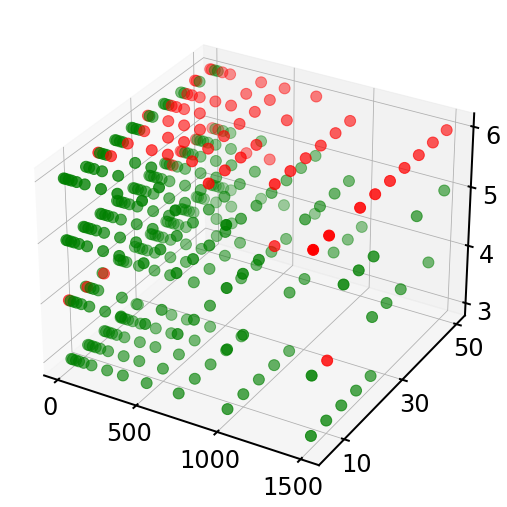

In [31]:
i=0
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(states_urf2[i][:,0], states_urf2[i][:,1], states_urf2[i][:,2], 
           marker='o', c=colors[states_urf2[i][:,3]-1], s=120)
ax.tick_params(labelsize=24)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,30,50])
ax.set_zticks([3,4,5,6])
plt.savefig(f'plots/urf3_{i}.pdf')
plt.show()

## state purities

In [17]:
purity_urf2_all = [
    get_state_purities( [ids_urf2[i][j] for i in range(len(n_pcca))], n_clus, msm_lags, n_pcca, if_n=None )
for j in range(5)]

In [18]:
purity_urf2_all = [
    np.concatenate(( 
    [ purity_urf2_all[i][j] for i in range(5) ]
    ))
for j in range(3)]

In [19]:
purity_urf2_all = [
    get_reverse_ecdf(i) for i in purity_urf2_all
]

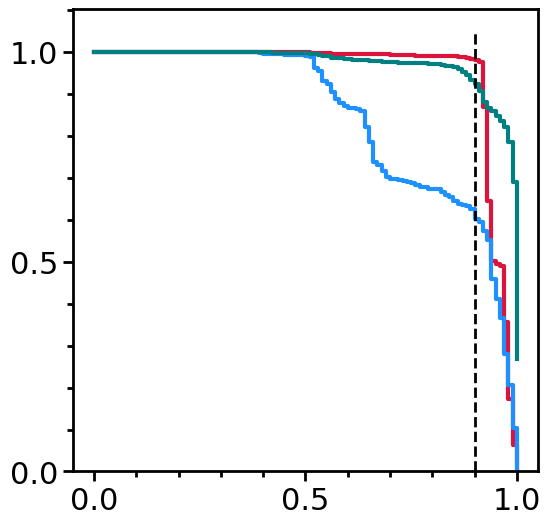

In [35]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.plot(purity_urf2_all[0][:,0], purity_urf2_all[0][:,1], c='crimson', lw=3, label='unbound')
ax.plot(purity_urf2_all[1][:,0], purity_urf2_all[1][:,1], c='dodgerblue', lw=3, label='intermediate')
ax.plot(purity_urf2_all[2][:,0], purity_urf2_all[2][:,1], c='teal', lw=3, label='bound')
ax.plot([0.9,0.9],[0,1.05], '--', lw=2, c='black')
ax.spines[:].set_linewidth(2)
ax.set_ylim(0,)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2,)
ax.tick_params(which='minor', length=4, width=2)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,0.5,1])
# leg=ax.legend(fontsize=22, loc=3)
# leg.get_frame().set_alpha(0)
#
plt.savefig('plots/purity.pdf')
plt.show()

In [20]:
purities_vampnets = np.load('files_from_jmk5_vampnets/purities.npy')

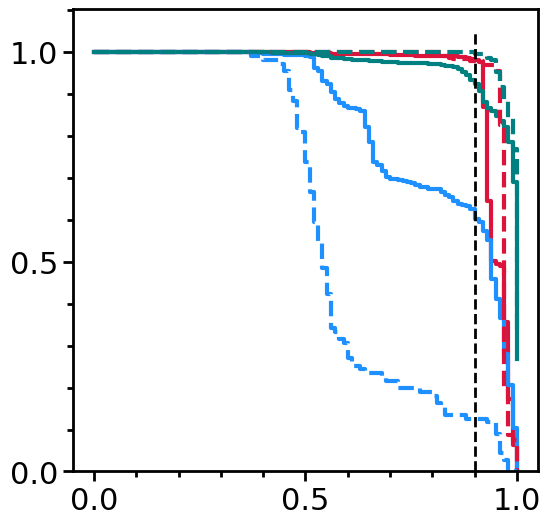

In [44]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.plot(purity_urf2_all[0][:,0], purity_urf2_all[0][:,1], c='crimson', lw=3, label='unbound')
ax.plot(purity_urf2_all[1][:,0], purity_urf2_all[1][:,1], c='dodgerblue', lw=3, label='intermediate')
ax.plot(purity_urf2_all[2][:,0], purity_urf2_all[2][:,1], c='teal', lw=3, label='bound')
#
colors=['crimson', 'dodgerblue', 'teal']
for c,i in enumerate(purities_vampnets):
    ax.plot(i[:,0], i[:,1], '--', color=colors[c], lw=3)
#
ax.plot([0.9,0.9],[0,1.05], '--', lw=2, c='black')
ax.spines[:].set_linewidth(2)
ax.set_ylim(0,)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2,)
ax.tick_params(which='minor', length=4, width=2)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,0.5,1])
# leg=ax.legend(fontsize=22, loc=3)
# leg.get_frame().set_alpha(0)
#
plt.savefig('plots/purity_with_vampnets.pdf')
plt.show()

In [20]:
i=3
pc = 3
dd = states_urf2[i][ states_urf2[i][:,3] == 3 ]
dd = dd[ dd[:,2] == pc ]
dd

array([[  30,   40,    3,    3],
       [  50,   40,    3,    3],
       [ 500,   40,    3,    3],
       [ 700,   40,    3,    3],
       [1000,   40,    3,    3]])

In [21]:
i=0
pc = 4
dd = states_urf2[i][ states_urf2[i][:,3] == 3 ]
dd = dd[ dd[:,2] == pc ]
dd

array([[  20,    5,    4,    3],
       [  30,   10,    4,    3],
       [  30,   15,    4,    3],
       [1500,   10,    4,    3]])

In [22]:
i=1
pc = 4
dd = states_urf2[i][ states_urf2[i][:,3] == 3 ]
dd = dd[ dd[:,2] == pc ]
dd

array([[20, 45,  4,  3]])

In [25]:
i=4
pc = 4
dd = states_urf2[i][ states_urf2[i][:,3] == 3 ]
dd = dd[ dd[:,2] == pc ]
dd

array([[250,   5,   4,   3],
       [350,  10,   4,   3]])

In [28]:
i=3
pc = 5
dd = states_urf2[i][ states_urf2[i][:,3] == 3 ]
dd = dd[ dd[:,2] == pc ]
dd

array([[  20,   30,    5,    3],
       [  20,   40,    5,    3],
       [  20,   45,    5,    3],
       [  30,   40,    5,    3],
       [  30,   45,    5,    3],
       [  30,   50,    5,    3],
       [  50,   40,    5,    3],
       [  50,   45,    5,    3],
       [  70,   35,    5,    3],
       [  70,   40,    5,    3],
       [  70,   45,    5,    3],
       [ 100,   25,    5,    3],
       [ 100,   35,    5,    3],
       [ 100,   40,    5,    3],
       [ 100,   45,    5,    3],
       [ 100,   50,    5,    3],
       [ 150,   25,    5,    3],
       [ 150,   30,    5,    3],
       [ 150,   35,    5,    3],
       [ 150,   40,    5,    3],
       [ 150,   45,    5,    3],
       [ 150,   50,    5,    3],
       [ 250,   25,    5,    3],
       [ 250,   30,    5,    3],
       [ 250,   35,    5,    3],
       [ 250,   40,    5,    3],
       [ 250,   45,    5,    3],
       [ 250,   50,    5,    3],
       [ 350,   40,    5,    3],
       [ 350,   50,    5,    3],
       [ 5

In [29]:
i=3
pc = 6
dd = states_urf2[i][ states_urf2[i][:,3] == 3 ]
dd = dd[ dd[:,2] == pc ]
dd

array([[  20,    5,    6,    3],
       [  20,   10,    6,    3],
       [  20,   15,    6,    3],
       [  20,   20,    6,    3],
       [  20,   25,    6,    3],
       [  20,   30,    6,    3],
       [  20,   35,    6,    3],
       [  20,   40,    6,    3],
       [  20,   45,    6,    3],
       [  20,   50,    6,    3],
       [  30,   20,    6,    3],
       [  30,   25,    6,    3],
       [  30,   30,    6,    3],
       [  30,   35,    6,    3],
       [  30,   40,    6,    3],
       [  30,   45,    6,    3],
       [  30,   50,    6,    3],
       [  70,   25,    6,    3],
       [  70,   30,    6,    3],
       [  70,   40,    6,    3],
       [  70,   45,    6,    3],
       [  70,   50,    6,    3],
       [ 100,   10,    6,    3],
       [ 100,   15,    6,    3],
       [ 100,   20,    6,    3],
       [ 100,   25,    6,    3],
       [ 100,   30,    6,    3],
       [ 100,   35,    6,    3],
       [ 100,   40,    6,    3],
       [ 100,   45,    6,    3],
       [ 1